# Најмањи квадрати и регресија

**Садржај:**

1. [Најмањи квадрати](#Најмањи-квадрати)
1. [Уопштени проблем најмањих квадрата](#Уопштени-проблем-најмањих-квадрата)
1. [Регресија](#Регресија)

In [1]:
from timeit import default_timer as timer
import numpy as np
import numpy.random as rndm
import scipy.linalg as spl
import matplotlib as mplb
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

***

## Најмањи квадрати

Класичан проблем најмањих квадрата, који су дефинисали и решили Гаус и Лежандр око 1800. године, представља један од сјајних примера примене својстава ортогоналности. Метод се користи за одређивање приближног решења несагласног система линеарних једначина $$Ax = b,$$ где су $A\in\mathcal{M}_{m\times n}$ матрица система пуног ранга колона, $x\in\mathbb{R}^n$ вектор непознатих и $b\in\mathbb{R}^m$ вектор слободних чланова. 

У случају када је ${\rm rang}(A)=n<m$ мањи од ${\rm rang}([A|b])=n+1\leq m$ систем $Ax = b$ нема решења. У таквој ситуацији употребљава се метод најмањих квадрата за проналажење приближног решења $\hat{x}$ које ће минимизирати одступање 
$\|b-Ax\|^2,$ тј. 
$$\min_{x\in\mathbb{R}^m}\|b-Ax\|^2=\|b-A\hat{x}\|^2.$$

<div class="alert alert-block alert-success">
<b>Класичан проблем најмањих квадрата :</b> 
    
За матрицу $A\in\mathcal{M}_{m\times n}$ и вектор $b\in\mathbb{R}^m$ решење проблема најмањих квадрата једначине $Ax=b$ представља вектор $\widehat{x}\in\mathbb{R}^n$ за који је резидуални вектор најмањи
$$\|r\|=\|b-A\widehat{x}\|\leq\|b-Ax\|,\qquad\forall x\in\mathbb{R}^n.$$    
</div>

<div>
   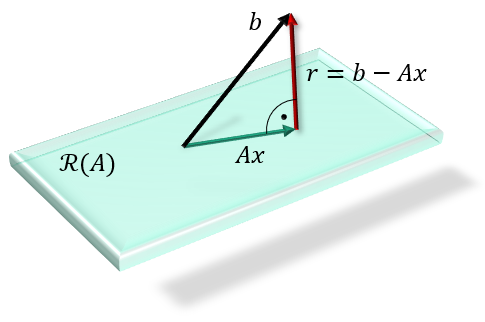  
</div>

Познато је да ће у унитарним просторима резидуални вектор $r=b-Ax$ бити најмањи када је ортогоналан на простор колона матрице $A,$ тј. када је $Ax$ ортогонална пројекција вектора $b$ на $\mathcal{R}(A).$ 

Услов ове ортогоналности $r\perp\mathcal{R}(A)$ можемо најлакше да опишемо једнакошћу 
$$A^Tr=A^T(b-Ax)=\theta.$$
Тако долазимо до сагласног квадратног система једначина који даје решење проблема најмањих квадрата:
$$A^TAx=A^Tb.$$
Овај систем зовемо нормалне једначине система $Ax=b.$ Нормалне једначине ће имати јединствено решење уколико је Грамова матрица $A^TA$ регуларна. То се дешава управо онда када је $A$ матрица пуног ранга колона. У таквој ситуацији решење проблема најмањих квадрата гласи
$$\widehat{x}=(A^TA)^{-1}A^Tb=A^+b.$$

Ово решење $\hat{x}$ минимизира суму квадрата "координатних грешака", отуд и име метода.
$$\min_{x\in\mathbb{R}^n}\|r\|^2=\min_{x\in\mathbb{R}^n}\big(r_0^2+r_1^2+\dots+r_{n-1}^2\big).$$ 
Минимални вектор остатка $r=b-A\hat{x}$ назива се оптимални остатак.

С обзиром да се решење проблема најмањих квадрата добија уз пројекцију вектора $b$ на простор колона матрице $A,$ веома често се каже да се ово решење добија регресијом вектора $b$ на колоне матрице $A.$ Тако се метод најамњих квадрата још назива и регресија.

**Пример 1.** Помоћу нормалног система једначина одредићемо решење несагласног система датог у матричном облику $Ax=b,$
$$A=\begin{bmatrix}4&0\\0&2\\1&1\end{bmatrix},\qquad b=\begin{bmatrix}2\\0\\11\end{bmatrix}.$$
Одредимо најпре матрице из нормалне једначине.

In [2]:
A=np.array([[4,0],[0,2],[1,1]])
b=np.array([2,0,11])
M=np.transpose(A)@A
print(M)
c=np.transpose(A)@b
print(c)

[[17  1]
 [ 1  5]]
[19 11]


Сада решавамо систем једначина $Mx=c,$ за $M=\begin{bmatrix}17&1\\1&5\end{bmatrix},\quad c=\begin{bmatrix}19\\11\end{bmatrix}.$ 

In [3]:
x_hat=spl.solve(M,c)
x_hat

array([1., 2.])

Грешка апроксимације решењем проблема најмањих квадрата може да се одреди изразом реидуалног вектора $r=b-A\widehat{x}.$

In [4]:
r=b-A@x_hat
print(r)
print(np.linalg.norm(r))  #norma rezidualnog vektora
print(np.dot(r,r))        #kvadrat norme rezidualnog vektora

[-2. -4.  8.]
9.16515138991168
84.0


Проверимо ортогоналност вектора $r$ и колона матрице $A.$

In [5]:
A.T@r

array([0., 0.])

Упоредићемо добијени резултат са формулом $\widehat{x}=A^+b.$

In [6]:
Amp=np.linalg.pinv(A)
Amp@b

array([1., 2.])

Python поседује уграђену функцију за израчунавање решења проблема најмањих квадрата. Применићемо је за претходни проблем.

In [7]:
np.linalg.lstsq(A, b, rcond=None)

(array([1., 2.]), array([84.]), 2, array([4.13312987, 2.21748449]))

Излаз ове наредбе садржи решење проблема најмањих квадрата, квадрат норме резидуалног вектора, ранг матрице система и њене сингуларне вредности.

In [8]:
x=np.linalg.lstsq(A, b, rcond=None)[0]
print(x)

[1. 2.]


Слично функционише и наредба у SciPy библиотеци. 

In [9]:
spl.lstsq(A, b)

(array([1., 2.]), 84.00000000000003, 2, array([4.13312987, 2.21748449]))

In [10]:
x= spl.lstsq(A, b)[0]
print(x)

[1. 2.]


***

**Пример 2.** Претпоставимо да је потребно одредити висине три планине $h_1,h_2$ и $h_3.$ Са једног локалитета измерене су висине $2474m, 3882m$ и $4834m.$ Мерено са планине $h_1,$ висин $h_2$ је надвисује за $1422m,$ а $h_3$ је $2354m$ виша. Мерено са $h_2,$ $h_3$ делује више за $950m.$ Проценићемо висине $h_1,h_2$ и $h_3$ које су најсагласније са мереним подацима.

Наведена мерења могу да се опишу следећим једнакостима:
\begin{align}
    h_1&=2474,\quad
    h_2=3882,\quad 
    h_3=4834,\\
    h_2-h_1&=1442,\quad h_3-h_1=2354,\quad
    h_3-h_2=950.
\end{align}

Матрични запис добијеног несагласног система је
$$Ah=b\ \Longleftrightarrow\ \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\\
-1&1&0\\-1&0&1\\0&-1&1\end{bmatrix}
\begin{bmatrix} h_1\\h_2\\h_3\end{bmatrix}
=\begin{bmatrix}2474\\3882\\4834\\1442\\2354\\950\end{bmatrix}.$$

Потражићемо решење проблема најмањих квадрата овог несагласног система.

In [11]:
A=np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b=np.array([2474,3882,4834,1442,2354,950])
resenje=spl.lstsq(A,b)
h=resenje[0]
print("h=",h)
print("||res||=",np.sqrt(resenje[1]))
print("res=",b-A@h)

h= [2467. 3891. 4832.]
||res||= 25.69046515733067
res= [  7.  -9.   2.  18. -11.   9.]


Решење преко Мур-Пенроузовог инверза:

In [12]:
Amp=np.linalg.pinv(A)
Amp@b

array([2467., 3891., 4832.])

Решење преко нормалне једначине:

In [13]:
spl.solve(A.T@A,A.T@b)

array([2467., 3891., 4832.])

***

**Задатак 1.** Наћи решење проблема најмањих квадрата $Ax=b$ где су
$$A=\begin{bmatrix}2&1&2\\4&5&0\\7&0&0\\1&2&-3\\-1&1&3\end{bmatrix},\quad x=\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix},\quad b=\begin{bmatrix}0\\1\\2\\-1\\3\end{bmatrix}.$$

**Решење :** 

In [15]:
A=np.array([[2,1,2],[4,5,0],[7,0,0],[1,2,-3],[-1,1,3]])

In [16]:
b=np.array([0,1,2,-1,3])
x=spl.lstsq(A, b)[0]
print(np.round(x,2))

[0.19 0.07 0.57]


***

**Задатак 2.** Нека је $A\in\mathcal{M}_{m\times n}$ матрица пуног ранга колона, $b\in\mathbb{R}^n$ вектор и $\hat{x}$ решење проблема најмањих квадрата $Ax=b.$ Доказати:

а)  За произвољан вектор $x\in\mathbb{R}^n$ важи да је $(Ax)\cdot b=(Ax)\cdot(A\hat{x}).$

б)  За ненула векторе $A\hat{x}$ и $b$ важи да је $\cos\angle(A\hat{x},b)=\dfrac{\|A\hat{x}\|}{\|b\|}\,.$

в) Решење проблема најмањих квадрата $\hat{x}$ минимизира угао између вектора $Ax$ и $b.$

**Решење :** 

а) Нека је $\hat{x}=(A^TA)^{-1}A^Tb$ решење проблема најмањих квадрата $Ax=b.$  Тада је
\begin{align}
    (Ax)\cdot(A\hat{x})&=(Ax)^T(A(A^TA)^{-1}A^Tb)=x^TA^TA(A^TA)^{-1}A^Tb=x^TA^Tb=(Ax)^Tb\\
    &=(Ax)\cdot b.
\end{align}

б) $\cos\angle(A\hat{x},b)=\dfrac{(A\hat{x})\cdot b}{\|A\hat{x}\|\,\|b\|}
\stackrel{\rm a)}{=}\dfrac{(A\hat{x})\cdot(A\hat{x})}{\|A\hat{x}\|\,\|b\|}
=\dfrac{\|A\hat{x}\|^2}{\|A\hat{x}\|\,\|b\|}=\dfrac{\|A\hat{x}\|}{\|b\|}\,.$

Закључујемо да је $\cos\angle(A\hat{x},b)\geq0\ \Longrightarrow\ \angle(A\hat{x},b)\in[0,\pi/2].$

в) За вредност угла између два вектора узима се вредност из опсега $[0,\pi],$ тј. мањи од два могућа угла и без усмерења јер је $\cos$ парна функција. Приметимо да је на скупу $[0,\pi]$ функција $\cos$ монотоно опадајућа. 

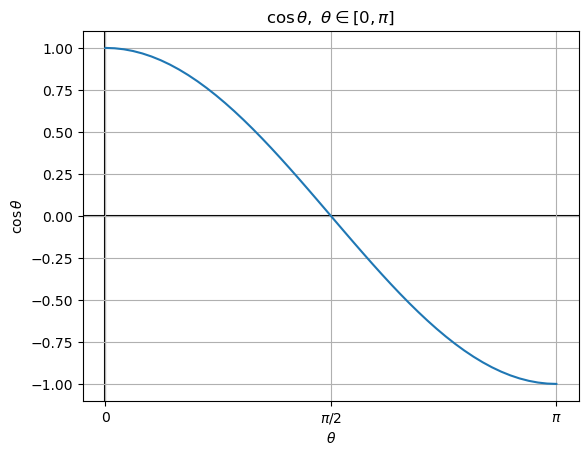

In [17]:
teta=np.linspace(0,np.pi)
kos=np.cos(teta)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\cos\theta$")
plt.title(r"$\cos\theta,\ \theta\in[0,\pi]$")
plt.grid()
plt.plot(teta,kos)
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.xticks([0,np.pi/2,np.pi],["0",r"$\pi/2$",r"$\pi$"]);

Тада је
\begin{align}
    \cos\angle(Ax,b)&=\dfrac{(Ax)\cdot b}{\|Ax\|\,\|b\|}
    \stackrel{\rm a)}{=}\dfrac{(Ax)\cdot(A\hat{x})}{\|Ax\|\,\|b\|}
    =\dfrac{(Ax)\cdot(A\hat{x})}{\|Ax\|\,\|A\hat{x}\|}
    \dfrac{\|A\hat{x}\|}{\|b\|}\\
    &\stackrel{\rm b)}{=}\cos\angle(Ax,A\hat{x})\cos\angle(A\hat{x},b)\leq\cos\angle(A\hat{x},b).
\end{align}
$\Longrightarrow\ \angle(Ax,b)\geq\angle(A\hat{x},b).$

***

**Задатак 3.** Означимо са $a_i^T$  врсте матрице $A\in\mathcal{M}_{m\times n}$ пуног ранга колона
$$A=\left[\begin{array}{c} \phantom{ww}a_0^T\phantom{ww}\\[3pt] \hline a_1^T\\[4pt]\hline \vdots\\[3pt]\hline a_{m-1}^T\end{array}\right].$$
У проблему најмањих квадрата $Ax=b$ минимизира се функција 
$\|Ax-b\|^2=\displaystyle\sum_{i=0}^{m-1}(a_i^Tx-b_i)^2,$ где је $b=\begin{bmatrix} b_0&\dots&b_{m-1}\end{bmatrix}^T$ колона слободних чланова. 
Решење овог проблема дато је изразом
$$
\widehat{x}=(A^TA)^{-1}A^Tb=A^+b.
$$

Класичан проблем најмањих квадрата $Ax=b$ третира равноправно све карактеристике датог система једначина. 
Уколико желимо да растојање до неке карактеристике $b_i$ буде минимизирано више у поређењу са другим карактеристикама, на то се може утицати тежински метод најмањих квадрата. Променом облика функције која се минимизира на
$$\|Ax-b\|_w^2=\sum_{i=0}^{m-1}w_i^2(a_i^Tx-b_i)^2,\ w_i>0,$$ 
фаворизује се минимизација компоненти са већом тежином $w_i.$ 	

У проблему најмањих квадрата са ежинама минимизира се функција 
$$\|W(Ax-b)\|^2=\|Bx-d\|^2=\displaystyle\sum_{i=0}^{m-1}w_i^2(a_i^Tx-b_i)^2,\quad w_i>0$$ 
где је $W={\rm diag}(w_0,\dots,w_{m-1})\in\mathcal{M}_{m\times m},\quad$ $B=WA,\quad$ $d=Wb.$ 

Дати израз решења проблема најамњих квадрата са тежинама по угледу на израз $
\widehat{x}=(A^TA)^{-1}A^Tb.
$

**Решење :** 

Уведимо ознаку за дијагоналну матрицу $W={\rm diag}(w_0,w_1,\dots,w_{m-1}).$ Користимо ознаку 
$$\|Ax-b\|_w^2=\|W(Ax-b)\|^2.$$ 
Приметимо најпре да је матрица $B=WA$ истог ранга колона као $A,$ тј. и $B=WA$ је пуног рага колона. Због тога се на проблем $Bx=d$ може применити аналогна формула за решење.
\begin{align}
    \widehat{x}&=(B^TB)^{-1}B^Td=(A^TW^TWA)^{-1}A^TW^TWb
    =(A^TW^2A)^{-1}A^TW^2b.
\end{align}

***

До сада обрађени проблем најмањих квадрата тицао се матрица несагласних система са пуним рангом колона. Наредни пример показаће шта се дешава када овај услов није испуњен.

Означимо са $\widehat{b}=P_{\mathcal{R}(A)}b=AA^+b$ ортогоналну пројекцију вектора $b$ на простор колона матрице $A.$ Тада је систем једначина $$Ax=\widehat{b}\tag{1}$$ сагласан, тј. има решење. Јединственост решења зависи од ранга матрице $A.$ Уколико је $A$ пуног ранга колона, систем $Ax=\widehat{b}$ има јединствено решење. У супротном систем ће имати бесконачно много решења. 

Решење проблема најмањих квадрата своди се на одређивање коефицијената $x$ линеарне комбинације колона матрице $A.$ Том линеарном комбинацијом изражава се вектор  $\widehat{b}.$
Како колоне матрице $A$ чине потпун систем вектора у $\mathcal{R}(A)$ то тражена линеарна комбинација сигурно постоји. Када су колоне линеарно зависне таква линеарна комбинација није једнозначно одређена, тј. постоји бесконачно много начина за исказивање вектора  $\widehat{b}.$

**Пример 3.** Помоћу нормалног система једначина одредићемо решење проблема најмањих квадрата несагласног система датог у матричном облику $Ax=b,$
$$A=\begin{bmatrix}1&1&0&0\\1&1&0&0\\1&0&1&0\\1&0&1&0\\1&0&0&1\\1&0&0&1\end{bmatrix},\qquad b=\begin{bmatrix}-3\\-1\\0\\2\\5\\1\end{bmatrix}.$$
Нормална једначина има следеће матрице:

In [18]:
A=np.array([[1,1,0,0],[1,1,0,0],[1,0,1,0],[1,0,1,0],[1,0,0,1],[1,0,0,1]])
b=np.array([-3,-1,0,2,5,1])
M=np.transpose(A)@A
print(M)
c=np.transpose(A)@b
print(c)

[[6 2 2 2]
 [2 2 0 0]
 [2 0 2 0]
 [2 0 0 2]]
[ 4 -4  2  6]


Јасно је да матрица $A$ није пуног ранга колона па ни Грамова матрица $M=A^TA$ није регуларна. Због тога систем
$$Mx=c\quad\Longleftrightarrow\quad
\begin{bmatrix}6&2&2&2\\2&2&0&0\\2&0&2&0\\2&0&0&2\end{bmatrix}
\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}4\\-4\\2\\6\end{bmatrix}$$ 
има бесконачно много решења. Решење оваквог система добићемо поново уграђеном функцијом. 

In [19]:
x=np.linalg.lstsq(A, b, rcond=None)
print(x)
A.T@(b-A@x[0])

(array([ 0.5, -2.5,  0.5,  2.5]), array([], dtype=float64), 3, array([2.82842712e+00, 1.41421356e+00, 1.41421356e+00, 2.67184961e-16]))


array([ 1.33226763e-15,  8.88178420e-16, -4.44089210e-16,  8.88178420e-16])

Примећујемо да је последња исписана сингуларна вредност матрице система блиска нули, што потврђује да $M=A^TA$ није регуларна матрица.

In [20]:
x=np.linalg.lstsq(A, b, rcond=None)[0]
print(b-A@x)
np.linalg.norm(b-A@x)

[-1.  1. -1.  1.  2. -2.]


3.4641016151377544

In [21]:
Amp=np.linalg.pinv(A)
Amp@b

array([ 0.5, -2.5,  0.5,  2.5])

Како је одабрано једно решење међу њих бесконачно много тема је наредног одељка.

***

## Уопштени проблем најмањих квадрата

Када матрица несагласног система $Ax=b$ није пуног ранга колона, решење проблема најмањих квадрата није јединствено. Има их бесконачно много, и уколико је $x_0$ једно од њих, сва решења могу се записати у облику:
$$R_S=x_0+\mathcal{N}(A).$$
Заиста, ако је $v\in\mathcal{N}(A),$ тада је резидуални вектор за $x_0$ и $x_0+v$ исти,
$$\|b-A(x_0+v)\|=\|b-Ax_0-Av\|=\|b-Ax_0-\theta\|=\|b-Ax_0\|.$$

Због тога се формулација проблема најмањих квадрата мења како би се обезбедила једнозначност решења формулисаног проблема.

<div class="alert alert-block alert-success">
<b>Уопштени проблем најмањих квадрата :</b> 
    
За матрицу $A\in\mathcal{M}_{m\times n}$ и вектор $b\in\mathbb{R}^m$ решење проблема најмањих квадрата једначине $Ax=b$ представља вектор $\widehat{x}\in\mathbb{R}^n$ минималне норме за који је резидуални вектор минималне норме, такође.
$$\|r\|=\|b-A\widehat{x}\|\leq\|b-Ax\|\quad\wedge\quad \|\widehat{x}\|\leq\|x\|,\qquad\forall x\in\mathbb{R}^n.$$    
</div>

**Теорема 1.** Решење проблема најмањих квадрата најмање норме дато је изразом $\widehat{x}=A^+b.$

**Доказ :**

Приметимо за почетак да $\widehat{x}=A^+b$ заиста јесте решење једначине $Ax=\widehat{b}$  јер је
$A\widehat{x}=AA^+b=\hat{b},$ где је са $\hat{b}$ означена пројекција вектора $b$ на простор колона матрице $A.$ Остаје да покажемо да је то решење минималне норме. 

Нека је $x_0=\widehat{x}+v,\ v\in\mathcal{N}(A)$ произвољно решење једначине $Ax=AA^+b.$ С обзиром да је 
$$\widehat{x}\in\mathcal{R}(A^+)=\mathcal{N}(A)^{\perp}$$
то су вектори $\widehat{x}$ и $v$ међусобно ортогонални. Због тога за норму вектора $x_0$ важи Питагорина теорема,
$$\|x_0\|^2=\|\widehat{x}+v\|^2=\|\widehat{x}\|^2+\|v\|^2\geq\|\widehat{x}\|^2.\quad\Box$$

***

**Напомена :** Решење $x=A^+b$ тачно је и у случају сагласног система линеарних једначина $Ax=b,$ као и у случају једнозначног (јединственог) решења. Облик $x=A^+b$ је тако универзалнији запис за решења линеарних једначина, било регуларних или несагласних типова.

***

## Регресија

Линеарна алгебра је у тесној вези са проблемима оптимизације, који се веома често појављују у машинском учењу. Решавање система линеарних једначина је веома специјалан случај једног од фундаменталних проблема машинског учења - линеарна регресија. Један могућ начин решавања система линеарних једначина $Ax = b$ јесте посматрањем кроз оптимизациони проблем у коме желимо да минимизирамо функцију циља (objective function) $\|Ax − b\|^2.$ Ово представља класичну регресију методом најмањих квадрата. Минимална вредност функције циља је јасно $0,$ која се добија када тачно решење система  $Ax = b$ постоји. Када то није случај тј. када је систем несагласан, оптимизациони проблем ће дати решење које је са најмањим резидуалним одступањем. 

Компјутерске и друге науке баве се проучавањем система и процеса на основу мерених величина у својству података који се нумерички обрађују. [Математички модел](https://en.wikipedia.org/wiki/Mathematical_model) је опис неког система, или процеса, употребом математичког језика и њених концепата. Састоји се од променљивих величина и релација између њих.  Променљиве величине описују неке карактеристике система (features) као што су нпр. бројач, сигнал, одзив или одговор, време, фаза процеса или нека мерена физичка величина, и слично. Сам модел задаје се дефинисањем релација над праћеним променљивим величинама. Релације се уобичајено задају дијаграмима (графовима) или описују неком функционалном везом облика
$g(x)=y,\ x\in\mathbb{R}^k,\ y\in\mathbb{R}^s.$ 
$$g(x)=\begin{bmatrix} g_0(x)\\g_1(x)\\ \vdots\\ g_{s-1}(x)\end{bmatrix}
=\begin{bmatrix} g_0(x_0,x_1,\dots,x_{k-1})\\g_1(x_0,x_1,\dots,x_{k-1})\\ \vdots\\ 
g_{s-1}(x_0,x_1,\dots,x_{k-1})\end{bmatrix}
=\begin{bmatrix} y_0\\y_1\\ \vdots\\y_{s-1}\end{bmatrix}=y.\tag{2}$$

Овде нас занимају релације исказане неком функционалном везом $(2).$
Функција $g$ из $(2)$ назива се функција модела или скраћено предикција, тј. предвиђање. Вектор мерених величина $x$ у таквом контексту се употребљава да опише услове под којима се траже вредности компоненти вектора $y.$ Дакле неке тешко мерљиве или немерљиве карактеристике система покушавају да се опишу и предвиде њихове вредности ради посредног управљања исходом модела или предвиђањем начина понашања модела под неким новим условима. Функције $g_i(x),\ i=0,1,\dots,{s-1},$ називају се компонентне или координатне функције и служе за опис праћене скларне величине $y_i.$ На тај начин задаје се експлицитни математички модел коме је $x$ скуп улазних величина, а $y$ излаз моделираног система или феномена.

Фундаменталан проблем у инжењерству, и науци уопште, јесте успостављање математичког модела, односно одређивање функционалне зависности $g(x)=y,\ g:\mathbb{R}^k\to\mathbb{R}^s.$ Овај процес назива се математичко моделирање.
Како се проблем моделирања своди на одређивање координатних функција $g_i(x),$ у наставку ћемо посматрати искључиво случај $s=1,$ када је $g(x)=y\in\mathbb{R},$ где је $g$ реална функција више реаллних променљивих, тј. $g:\mathbb{R}^k\to\mathbb{R}.$ 

У процесу моделирања најпре је потребно одредити врсту функције $g,$ тј. облик функционалне зависности посматраних карактеристика система или феномена: да ли је периодичан или не, да ли је линеарана, квадратни или уопште степени; да ли је експоненцијалан, логаритамски, тригонометријски и сл. Затим је потребно подесити параметре фунцкионалне зависности тако да модел даје што боље предвиђање вредности излаза $y$ под условима улаза $x.$ Тако целокупан модел $g$ описујемо неким базним функцијама које се уз параметризацију комбинују у сложенији израз,
$$g(x)=g\big(x;\underbrace{\varphi_0(x),\ \dots,\ \varphi_{m-1}(x)}_{\mbox{базне функције модела}};\underbrace{\lambda_0,\ \dots,\ \lambda_{s-1}}_{\mbox{параметризација}}\big).$$

Линеарна алгебра примењује се код математичких модела са линеарном параметарском зависношћу. То су модели облика
$$g(x)=\lambda_0\varphi_0(x)+\lambda_1\varphi_1(x)+\dots+\lambda_{m-1}\varphi_{m-1}(x),$$
где се функцијама $\varphi_i$ изражава функционална зависност, а параметрима $\lambda_i$ она 'прецизније подешава'. Функције $\varphi_i$ служе за грубу скицу законитости $g.$ Математички модел је успостављен када су познате базисне функције и параметри модела. Пожељно је тестирати добијени модел на неком скупу података. 
 За квалификацију грешке модела осим уобичајених норми могу се користити и статистичке карактеристике вектора.  

Оређивање вредности параметара $\lambda_i,$ као и провера квалитета модела базира се на доступним подацима. 
Подаци чине мере праћених величина система, или обзервације 
$$S=\{(a_i,b_i),\ a_i\in\mathbb{R}^k,\ b_i\in\mathbb{R},\ i=0,1,\dots,n-1\}.$$ 
Параметри $\lambda_i$ одређују се из услова блискости $g(a_i)\approx b_i,\ i=0,1,\dots,n-1.$ Квалитет модела процењује се растојањем  $g(a_i)- b_i,\ i=0,1,\dots,n-1.$

Кроз примере у наставку бавимо се алгебарским моделима и користимо као меру блискости Еуклидову норму.

**Пример 4.** 	Претпоставимо да желимо да одредимо коефицијенте линеарне функције $$y=kx+p$$ која описује везу између две величине $x\in\mathbb{R}$ и $y\in\mathbb{R}.$  За њихово одређивање користимо $n$ парова вредности
	$$(a_0, b_0), (a_1, b_1), \dots , (a_{n-1}, b_{n-1}).$$ 
Циљ је одредити $k$ и $p$ такве да је $b_i \approx ka_i+p,\ i=0,1,\dots,n-1.$

In [22]:
x=rndm.uniform(0,30,150)
y=3.5*x+rndm.normal(5,10,150)
p=np.polyfit(x,y,1)   #naredba za aproksimaciju polinomom zadatog stepena
t=np.array([0,30])
pt=np.polyval(p,t)

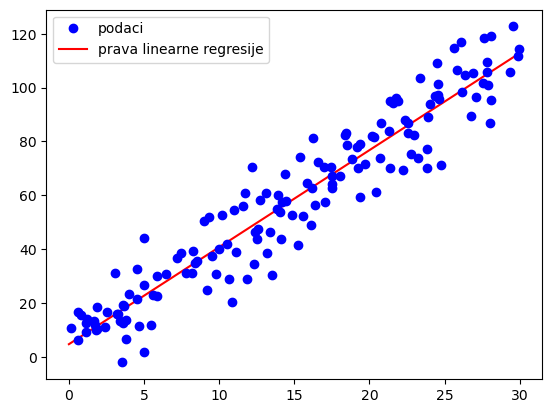

In [23]:
plt.plot(x,y,'ob', label="podaci", zorder=1)
plt.plot(t,pt,'-r', label="prava linearne regresije", zorder=-1)
plt.legend(loc='upper left');

Можемо да проверимо оправданост избора линеарног модела провером модела за полиноме вишег степена.

In [24]:
p2=np.polyfit(x,y,2)   
p3=np.polyfit(x,y,3)
p4=np.polyfit(x,y,4)
p20=np.polyfit(x,y,20)
tx=np.linspace(0,30)
pt2=np.polyval(p2,tx)
pt3=np.polyval(p3,tx)
pt4=np.polyval(p4,tx)
pt20=np.polyval(p20,tx)

C:\Users\jovan\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


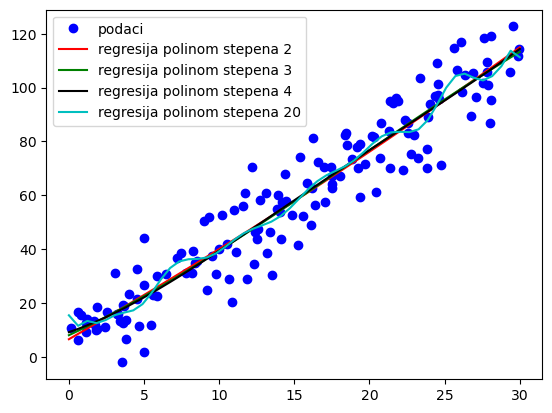

In [25]:
plt.plot(x,y,'ob', label="podaci", zorder=-1)
plt.plot(tx,pt2,'-r', label="regresija polinom stepena 2", zorder=1)
plt.plot(tx,pt3,'-g', label="regresija polinom stepena 3", zorder=1)
plt.plot(tx,pt4,'-k', label="regresija polinom stepena 4", zorder=1)
plt.plot(tx,pt20,'-c', label="regresija polinom stepena 20", zorder=1)
plt.legend(loc='upper left');

Код проблема линеарне регресије полиномом првог степена изразе за коефицијенте регресионе праве можемо да добијемо у затвореном облику. Систем једначина коефицијената регресионе праве $A\Lambda=b$  има матрице
$$A=\begin{bmatrix} a_0&1\\ a_1&1\\ \vdots&\vdots\\ a_{n-1}&1\end{bmatrix},\quad
\Lambda=\begin{bmatrix} k\\ p\end{bmatrix},\quad 
b=\begin{bmatrix} b_0\\b_1\\ \vdots\\ b_{n-1}\end{bmatrix}.$$

Означимо са $\mathbb{1}=\begin{bmatrix}1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n$ вектор свих јединица, и са 
$a=\begin{bmatrix} a_0&a_1&\dots&a_{n-1}\end{bmatrix}^T.$ Приметимо да је $\mathbb{1}^T\mathbb{1}=n.$ Матрице у нормалним једначинама тада гласе 
$$\begin{array}{l}A^TA=\begin{bmatrix} a_0&a_1&\dots&a_{n-1}\\1&1&\dots&1\end{bmatrix}
\begin{bmatrix} a_0&1\\ a_1&1\\ \vdots&\vdots\\ a_{n-1}&1\end{bmatrix}=
\begin{bmatrix} \|a\|^2&a^T\mathbb{1}\\[5pt] \mathbb{1}^Ta&\mathbb{1}^T\mathbb{1}\end{bmatrix}
=\begin{bmatrix} \|a\|^2&\mathbb{1}^Ta\\[5pt] \mathbb{1}^Ta&n\end{bmatrix},\\
A^Tb=\begin{bmatrix} a_0&a_1&\dots&a_{n-1}\\1&1&\dots&1\end{bmatrix}
\begin{bmatrix} b_0\\b_1\\ \vdots\\ b_{n-1}\end{bmatrix}=	
\begin{bmatrix} a^Tb\\[5pt] \mathbb{1}^Tb\end{bmatrix}.
	\end{array}$$

Дакле, нормалне једначине су
$$\begin{bmatrix} \|a\|^2&\mathbb{1}^Ta\\ \mathbb{1}^Ta&n\end{bmatrix}
\begin{bmatrix} k\\ p\end{bmatrix}=
\begin{bmatrix} a^Tb\\ \mathbb{1}^Tb\end{bmatrix}.$$ 

Решење система можемо потражити, нпр. на основу једнакости
$$ (A^TA)^{-1}=\dfrac{1}{n\|a\|^2-(\mathbb{1}^Ta)^2}\begin{bmatrix} n&-\mathbb{1}^Ta\\[5pt] -\mathbb{1}^Ta&\|a\|^2\end{bmatrix}.$$
Коефицијенти $k$ и $p$ тада гласе
\begin{align} 
\begin{bmatrix} \widehat{k}\\ \widehat{p}\end{bmatrix}&=(A^TA)^{-1}A^Tb=\dfrac{1}{n\|a\|^2-(\mathbb{1}^Ta)^2}
\begin{bmatrix} na^Tb-\mathbb{1}^Ta\mathbb{1}^Tb\\[5pt] \|a\|^2\mathbb{1}^Tb-\mathbb{1}^Taa^Tb \end{bmatrix}.
\end{align}
Добијена линеарна функција $f(x)=\widehat{k}x+\widehat{p}$ представља предикциону функцију и користи се за предвиђање вредности величине $y$ на основу улаза $x.$ 

За сваки улазни податак $a_i$ означимо са $y_i$ излаз (предикцију) добијене функције регресије, тј. $y_i=\widehat{k}a_i+\widehat{p}.$ Тада вектор 
$$y=\begin{bmatrix} y_1\\y_2\\\vdots\\y_n\end{bmatrix}=A\begin{bmatrix} \widehat{k}\\ \widehat{p}\end{bmatrix}
=A\widehat{x},$$ 
представља предвиђање линеарног модела за улазе $a_i.$ Одступање добијених предвиђања $y_i$ од мерених вредности $b_i$  изражавамо резидуалним вектором $r=b-y=b-A\widehat{x},$ $\widehat{x}=\begin{bmatrix} \widehat{k}&\widehat{p}\end{bmatrix}^T$ који показује по координатама висинско одступање резултата модела од мерених вредности за сваки од улаза.
$$r=\begin{bmatrix} r_1\\r_2\\ \vdots\\ r_n\end{bmatrix}=\begin{bmatrix} b_1-y_1\\ b_2-y_2\\ \vdots\\ b_n-y_n\end{bmatrix}.$$ 
Одавде је јасно да регресиона права јесте права која минимизира збир квадрата вертикалних одстојања тачака података од те праве, видети слику у наставку.

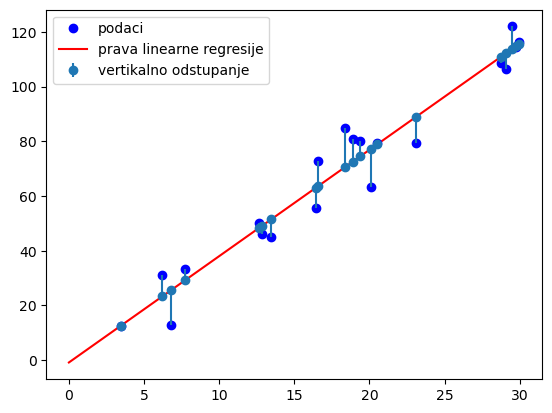

In [26]:
x=rndm.uniform(0,30,20)
y=3.5*x+rndm.normal(5,10,20)
p=np.polyfit(x,y,1)   #naredba za aproksimaciju polinomom zadatog stepena
t=np.array([0,30])
pt=np.polyval(p,t)
px=np.polyval(p,x)
err=np.array([px-y,y-px])
err[0][err[0]<0]=0
err[1][err[1]<0]=0
plt.plot(x,y,'ob', label="podaci", zorder=1)
plt.plot(t,pt,'-r', label="prava linearne regresije", zorder=-1)
plt.errorbar(x,px,yerr=err,fmt ='o', label="vertikalno odstupanje")
plt.legend(loc='upper left');

***

**Задатак 4.** Табелом и сликом представљен је број транзистора у Intel-овим процесорима у време њиховог увођења на тржиште, извор [Business News Daily](https://www.businessnewsdaily.com/10817-slideshow-intel-processors-over-the-years.html) и [Wikipedia](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors).



\begin{array}{l|c|l|c|l|c|l|c|l|c}
    god. & br.trn.& god. & br.trn.&god. & br.trn.& god. & br.trn.& god. & br.trn. \\ \hline\hline
     1971.& 2.3\cdot10^3 &1993.& 3.1\cdot10^6 & 2004.& 112\cdot10^6 & 2008.& 1.9\cdot10^9 & 2014.&1.4\cdot10^9 \\
     1972.& 3.5\cdot10^3 & 1995.& 5.5\cdot10^6 & 2004.& 592\cdot10^6 & 2010.& 1.17\cdot10^9 & 2014.& 2.6\cdot10^9 \\
     1974.& 4.5\cdot10^3 & 1997.& 7.5\cdot10^6 & 2005.& 169\cdot10^6 & 2010.& 2\cdot10^9 & 2014.& 4.31\cdot10^9 \\
     1978.& 29\cdot10^3 & 1998.& 7.5\cdot10^6 & 2005.& 228\cdot10^6 & 2010.& 2.3\cdot10^9 & 2014.& 5.56\cdot10^9 \\
     1982.& 55\cdot10^3 & 1999.& 9.5\cdot10^6 & 2006.& 184\cdot10^6 & 2011.& 1.16\cdot10^9 & 2015.& 1.75\cdot10^9 \\
     1982.& 134\cdot10^3 & 1999.& 27.4\cdot10^6 & 2006.& 362\cdot10^6 & 2011.& 2.27\cdot10^9 & 2015.& 1.9\cdot10^9 \\
     1985.& 275\cdot10^3 & 2000.& 21\cdot10^6 & 2006.& 291\cdot10^6 & 2011.& 2.6\cdot10^9 & 2016.& 3.2\cdot10^9 \\
     1988.& 250\cdot10^3 & 2000.& 42\cdot10^6 & 2006.& 1.7\cdot10^9 & 2012.& 0.43\cdot10^9 & 2016.& 7.2\cdot10^9 \\
     1989.& 600\cdot10^3 & 2001.& 45\cdot10^6 & 2007.& 169\cdot10^6 & 2012.& 1.4\cdot10^9 & 2016.& 8\cdot10^9 \\
     1989.& 1\cdot10^6 & 2002.& 55\cdot10^6 & 2008.& 230\cdot10^6 & 2012.& 3.1\cdot10^9 & 2017.& 8\cdot10^9 \\
     1989.& 1.18\cdot10^6 & 2002.& 220\cdot10^6 & 2008.& 731\cdot10^6 & 2012.& 5\cdot10^9 &&\\
     1992.& 0.9\cdot10^6 & 2003.& 410\cdot10^6 & 2008.& 47\cdot10^6 & 2013.& 1.86\cdot10^9 &&\\ \hline
\end{array}

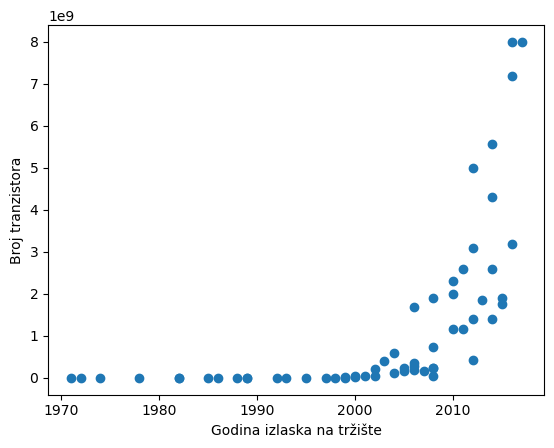

In [27]:
tabela=np.array([[1971,2.3e3],[1972,3.5e3],[1974,4.5e3],[1978,29e3],[1982,55e3],[1982,134e3],
                [1985,275e3],[1988,250e3],[1989,600e3],[1989,1e6],[1986,1.18e6],[1992,0.9e6],[1993,3.1e6],
                [1995,5.5e6],[1997,7.5e6],[1998,7.5e6],[1999,9.5e6],[1999,27.4e6],[2000,21e6],[2000,42e6],
                [2001,45e6],[2002,55e6],[2002,220e6],[2003,410e6],[2004,112e6],[2004,592e6],[2005,169e6],
                [2005,228e6],[2006,184e6],[2006,362e6],[2006,291e6],[2006,1.7e9],[2007,169e6],[2008,230e6],
                [2008,230e6],[2008,731e6],[2008,47e6],[2008,1.9e9],[2010,1.17e9],[2010,2e9],[2010,2.3e9],
                [2011,1.16e9],[2011,2.6e9],[2012,0.43e9],[2012,1.4e9],[2012,3.1e9],[2012,5e9],[2013,1.86e9],
                [2014,1.4e9],[2014,2.6e9],[2014,4.31e9],[2014,5.56e9],[2015,1.75e9],[2015,1.9e9],[2016,3.2e9],
                [2016,7.2e9],[2016,8e9],[2017,8e9]])
plt.scatter(tabela[:,0],tabela[:,1])
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("Broj tranzistora");

Логаритми ових карактеристика показују линеарну карактеристику.

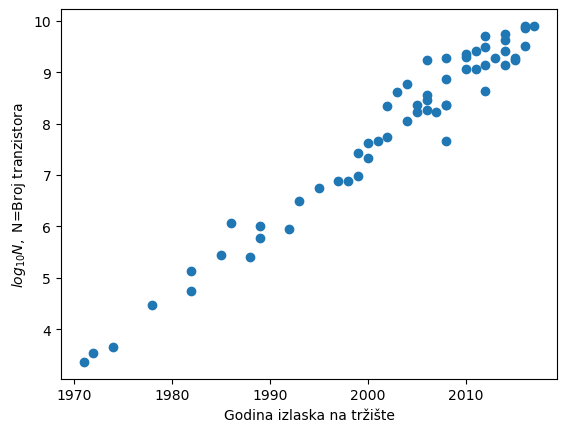

In [28]:
plt.scatter(tabela[:,0],np.log10(tabela[:,1]))
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("$log_{10}N,$ N=Broj tranzistora");

На основу табеле од $58$ података одредити параметре $k$ и $p$ којима се описује [Муров закону](https://en.wikipedia.org/wiki/Moore%27s_law) броја транзистора процесора у функцији од времена
$$\log_{10}N\approx k(t-1971)+p.$$

**Решење :** 

Тражене параметре модела линеарне регресије добијамо методом најмањих квадрата.

In [29]:
n,_=tabela.shape
print(n)

58


In [30]:
a=tabela[:,0]-1971
b=np.log10(tabela[:,1])
p=np.polyfit(a,b,1)
print(p)

[0.14318725 3.37136144]


На основу Intel-ових података, Муров закон добија облик
$$\log_{10}N\approx 0.14(t-1971)+3.37.$$
Графички приказ добијеног решења линеарне регресије дат је наредном сликом.

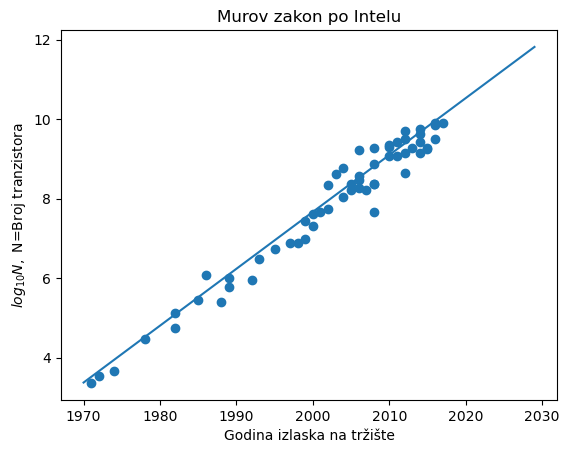

In [31]:
x=np.arange(1970,2030)
y=np.polyval(p,x-1970)
plt.plot(x,y)
plt.scatter(tabela[:,0],np.log10(tabela[:,1]))
plt.xlabel("Godina izlaska na tržište")
plt.ylabel("$log_{10}N,$ N=Broj tranzistora")
plt.title('Murov zakon po Intelu');

Добијени модел $$\log_{10}N\approx 0.14(t-1971)+3.37$$ предвиђа да ће Intel године $2030.$ на тржиште да избаци процесор са $10^{11.96}$ транзистора.

In [32]:
np.polyval(p,2030-1970)

11.96259636360736

***

Тренинг модела значи одређивање вредности параметара модела на основу скупа података који је за то намењен. Одређивање параметара базира се на минимизацији функције грешке модела. Наиме, тренинг подаци обима $m$ представљају скуп улазних вредности за које су познате излазне вредности,
\begin{align}
&(x_{00},x_{01},\dots,x_{0\,n-1})\mapsto y_0,\\
&(x_{10},x_{11},\dots,x_{1\,n-1})\mapsto y_1,\\
&\vdots\\
&(x_{m-1\,0},x_{m-1\,1},\dots,x_{m-1\,n-1})\mapsto y_{m-1}.
\end{align}

Функција модела $g_{\lambda}(x_0,x_1,\dots,x_{n-1}),$ где је ${\lambda}$ вектор параметара, за исти скуп улаза враћа вредности $\widehat{y_0},\widehat{y_1},\dots,\widehat{y_{m-1}}$ које зовемо предикција модела. Квалитет модела се тада мери неком раздаљином између вектора стварних вредности $y=\begin{bmatrix}y_0&y_1&\dots&y_{m-1}\end{bmatrix}$ и вектора предикција модела $\widehat{y}=\begin{bmatrix}\widehat{y_0}&\widehat{y_1}&\dots&\widehat{y_{m-1}}\end{bmatrix}.$ 

Када се раздаљина мери Еуклидовом нормом, параметре $\lambda$ који обезбеђују минимално растојање $$J(\lambda)=d(y,\widehat{y})^2=\|y-\widehat{y}\|_2^2$$ добијамо решењем одговарајућег проблема најмањих квадрата $X\lambda=y.$
Коед алгебарског модела матрица система $X$ садржи вредности монома који улазе у састав функције модела, $\lambda$ је вектор непознатих параметара модела и вектор $y$ су излазне вредности које је потребно моделирати.
Утицај избора степена модела упознаћемо на примеру функције једне променљиве.

**Пример 5.** Генерисаћемо податке који ће одговарати линеарној међузависности координата. Потражићемо решења проблема најмањих квадрата за различите степене функције модела. Графичким приказом можемо да упоредимо учинак модела.
\begin{align}
&f_1(x)=a_1x+a_0,\\
&f_2(x)=a_2x^2+a_1x+a_0,\\
&f_3(x)=a_3x^3+a_2x^2+a_1x+a_0,\\
&f_{20}(x)=a_{20}x^{20}+\dots+a_1x+a_0,\\
\end{align}

Матрице момената и елементи ситема којим је дефинисан проблем најмањих квадарата гласе
\begin{align}
f_1:&\qquad \lambda=\begin{bmatrix}a_0&a_1\end{bmatrix}^T,\qquad y=\begin{bmatrix}y_0&y_1&\dots&y_{m-1}\end{bmatrix}^T\\
&X=\begin{bmatrix}1&x_0\\1&x_1\\\vdots&\vdots\\1&x_{m-1}\end{bmatrix},\qquad X\lambda=y,\\
f_2:&\qquad \lambda=\begin{bmatrix}a_0&a_1&a_2\end{bmatrix}^T,\qquad y=\begin{bmatrix}y_0&y_1&\dots&y_{m-1}\end{bmatrix}^T\\
&X=\begin{bmatrix}1&x_0&x_0^2\\1&x_1&x_1^2\\\vdots&\vdots&\vdots\\1&x_{m-1}&x_{m-1}^2\end{bmatrix},\qquad X\lambda=y,\\
&\vdots
\end{align}

Функција којом се добијају коефицијенти полинома решења проблема најмањих квадрата је `polyfit`. Када је степен полинома $s,$ а број података једнак $s+1,$ функција враћа коефицијенте интерполационог полинома. У осталим случајевима враћа полином који минимизира Еуклидово растојање података по висини. 

In [38]:
m=100
x = 2*rndm.rand(m)-1
y = 4+3*x+rndm.randn(m)
p1=np.polyfit(x,y, 1,rcond=None, full=True)
p1

(array([3.09928119, 3.92187654]),
 array([107.41383752]),
 2,
 array([1.03401588, 0.96478555]),
 2.220446049250313e-14)

In [39]:
p1[0]   #koeficijenti polinoma

array([3.09928119, 3.92187654])

In [40]:
p1[1]   #kvadrat norme rezidualnog vektora 

array([107.41383752])

In [41]:
p1[1]/m   #prosecna kvadrat norme rezidualnog vektora 

array([1.07413838])

In [42]:
p2=np.polyfit(x,y, 2,rcond=None, full=True)
p3=np.polyfit(x,y, 3,rcond=None, full=True)
p20=np.polyfit(x,y, 20,rcond=None, full=True)

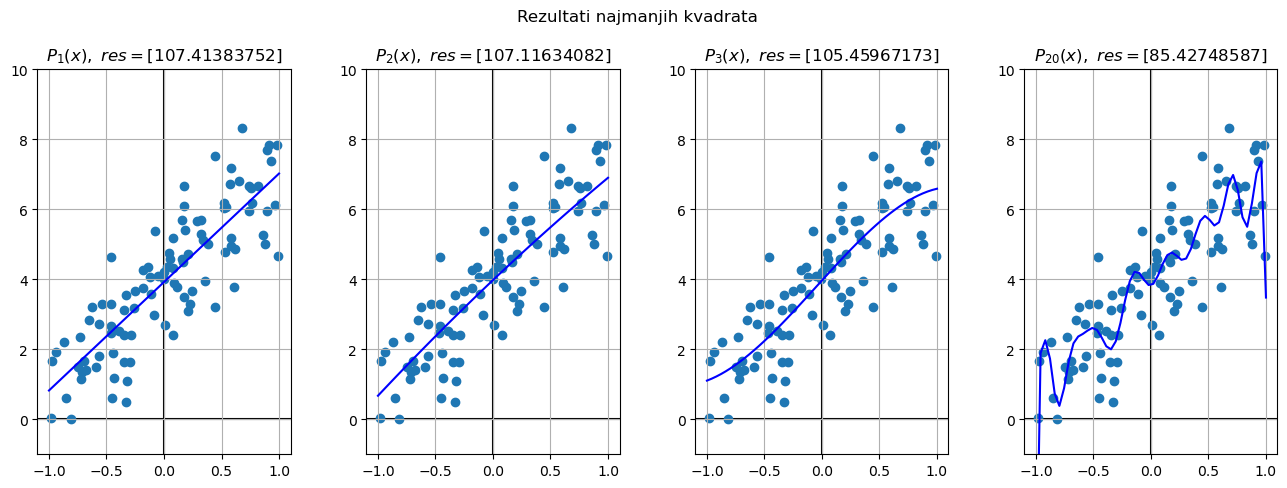

In [43]:
t=np.linspace(-1,1)
slika, ax = plt.subplots(1, 4,figsize=(16,5)) 
slika.suptitle('Rezultati najmanjih kvadrata',y=1)
slika.subplots_adjust(wspace = 0.3, hspace=0.5)

pom=np.polyval(p1[0],t)
plt.subplot(1, 4, 1)
plt.title(r"$P_1(x),\ res=$"+str(p1[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p2[0],t)
plt.subplot(1, 4, 2)
plt.title(r"$P_2(x),\ res=$"+str(p2[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p3[0],t)
plt.subplot(1, 4, 3)
plt.title(r"$P_3(x),\ res=$"+str(p3[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p20[0],t)
plt.subplot(1, 4, 4)
plt.title(r"$P_{20}(x),\ res=$"+str(p20[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Креираћемо нови скуп података по истом принципу. Он ће представљати валидациони скуп, односно скуп на коме ћемо да тестирамо добијене функције модела.

In [45]:
valid_x=rndm.uniform(-1,1,30)
valid_y = 4+3*valid_x+rndm.randn(30)
p1valid=np.polyval(p1[0],valid_x)
res1=np.linalg.norm(p1valid-valid_y)
k=np.sqrt(30)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p1[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res1/k)

srednjekvadratna greska model na trening podacima= [1.03640647]
srednjekvadratna greska model na validacionim podacima= 1.0511681070020038


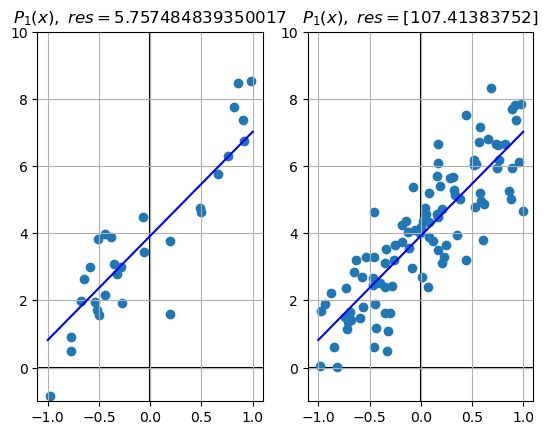

In [49]:
pom=np.polyval(p1[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_1(x),\ res=$"+str(res1))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_1(x),\ res=$"+str(p1[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [50]:
p2valid=np.polyval(p2[0],valid_x)
res2=np.linalg.norm(p2valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p2[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res2/k)

srednjekvadratna greska model na trening podacima= [1.03497025]
srednjekvadratna greska model na validacionim podacima= 1.0626445121841126


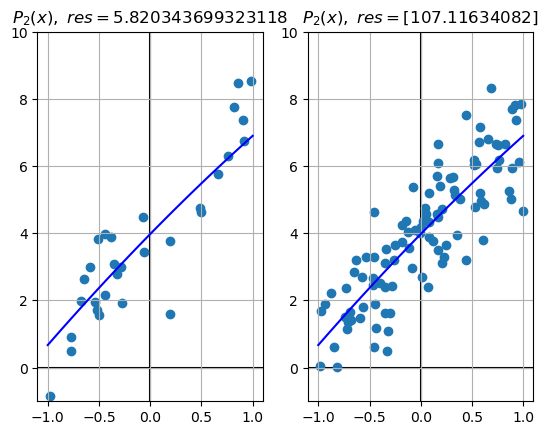

In [51]:
pom=np.polyval(p2[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_2(x),\ res=$"+str(res2))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_2(x),\ res=$"+str(p2[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [53]:
p3valid=np.polyval(p3[0],valid_x)
res3=np.linalg.norm(p3valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p3[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res3/k)

srednjekvadratna greska model na trening podacima= [1.0269356]
srednjekvadratna greska model na validacionim podacima= 1.141803713269508


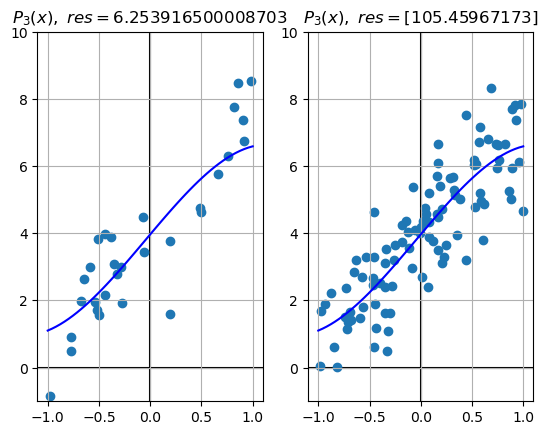

In [54]:
pom=np.polyval(p3[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_3(x),\ res=$"+str(res3))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_3(x),\ res=$"+str(p3[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [55]:
p20valid=np.polyval(p20[0],valid_x)
res20=np.linalg.norm(p20valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p20[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res20/k)

srednjekvadratna greska model na trening podacima= [0.92426991]
srednjekvadratna greska model na validacionim podacima= 1.265593532059472


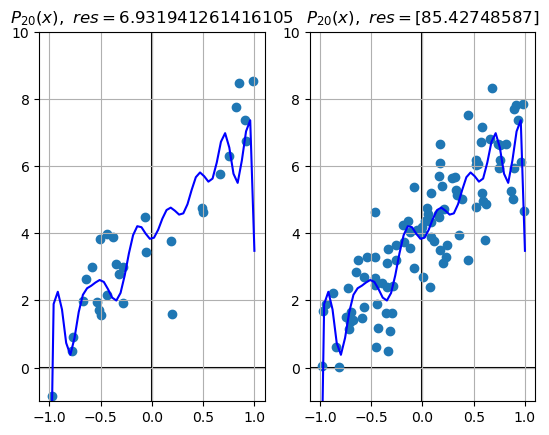

In [56]:
pom=np.polyval(p20[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_{20}(x),\ res=$"+str(res20))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_{20}(x),\ res=$"+str(p20[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

***

**Пример 6.** Креираћемо сада тренинг податке који одговарају квадратном моделу и упоредићемо резултате решења проблема најмањих квадрата за различите степене полинома функције модела.

In [57]:
x = 2*rndm.rand(m)-1
y = 1+0.5* x+2*(x**2) + 0.6*rndm.randn(m)
p1=np.polyfit(x,y, 1,rcond=None, full=True)
p2=np.polyfit(x,y, 2,rcond=None, full=True)
p3=np.polyfit(x,y, 3,rcond=None, full=True)
p20=np.polyfit(x,y, 20,rcond=None, full=True)

C:\Users\jovan\AppData\Local\Temp\ipykernel_2756\384121525.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)
C:\Users\jovan\AppData\Local\Temp\ipykernel_2756\384121525.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 3)


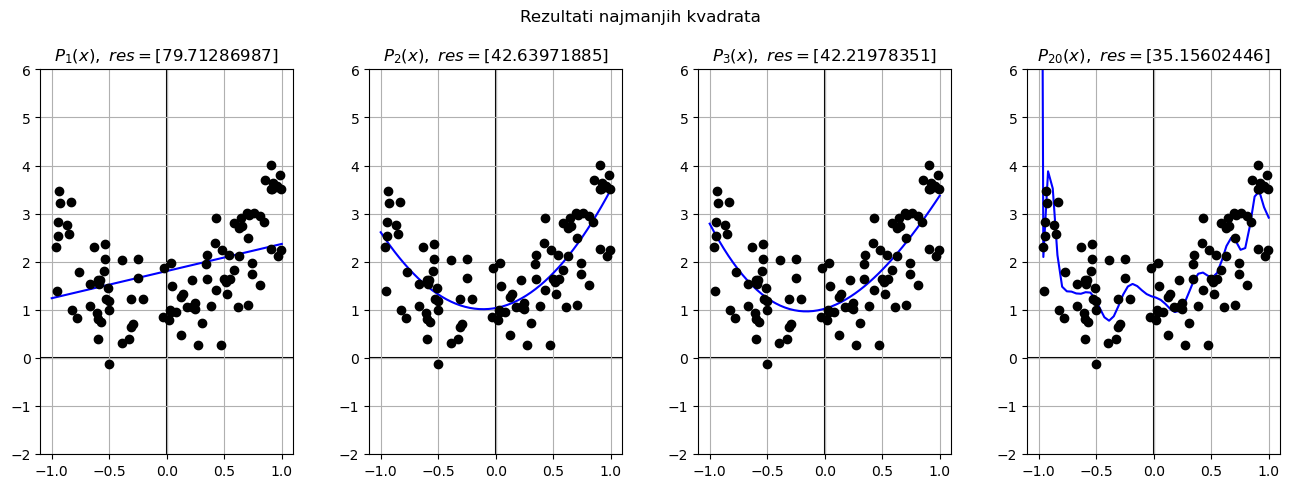

In [58]:
slika, ax = plt.subplots(1, 2,figsize=(16,5)) 
slika.suptitle('Rezultati najmanjih kvadrata',y=1)
slika.subplots_adjust(wspace = 0.3, hspace=0.5)

pom=np.polyval(p1[0],t)
plt.subplot(1, 4, 1)
plt.title(r"$P_1(x),\ res=$"+str(p1[1]))
plt.plot(t,pom,'-b')
plt.plot(x,y,'ok')
plt.ylim([-2, 6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p2[0],t)
plt.subplot(1, 4, 2)
plt.title(r"$P_2(x),\ res=$"+str(p2[1]))
plt.plot(t,pom,'-b')
plt.plot(x,y,'ok')
plt.ylim([-2, 6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p3[0],t)
plt.subplot(1, 4, 3)
plt.title(r"$P_3(x),\ res=$"+str(p3[1]))
plt.plot(t,pom,'-b')
plt.plot(x,y,'ok')
plt.ylim([-2, 6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

pom=np.polyval(p20[0],t)
plt.subplot(1, 4, 4)
plt.title(r"$P_{20}(x),\ res=$"+str(p20[1]))
plt.plot(t,pom,'-b')
plt.plot(x,y,'ok')
plt.ylim([-2, 6])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Креирамо валидационе податке за тестирање модела на непознатом скупу.

In [17]:
valid_x=rndm.uniform(-1,1,30)
valid_y = 1+0.5*valid_x+2*(valid_x**2) + 0.5*rndm.randn(30)
p1valid=np.polyval(p1[0],valid_x)
res1=np.linalg.norm(p1valid-valid_y)
k=np.sqrt(30)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p1[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res1/k)

srednjekvadratna greska model na trening podacima= [0.78448913]
srednjekvadratna greska model na validacionim podacima= 0.846285294892177


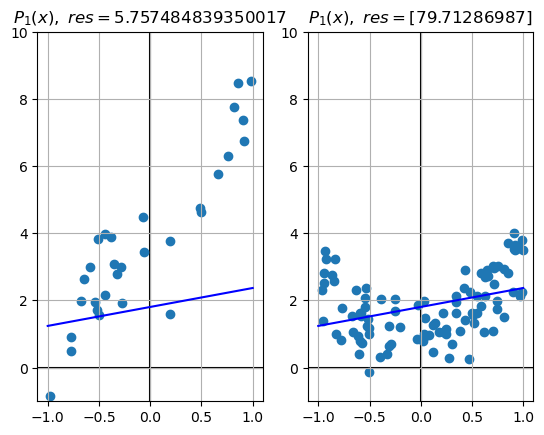

In [59]:
pom=np.polyval(p1[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_{1}(x),\ res=$"+str(res1))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_{1}(x),\ res=$"+str(p1[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [60]:
p2valid=np.polyval(p2[0],valid_x)
res2=np.linalg.norm(p2valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p2[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res2/k)

srednjekvadratna greska model na trening podacima= [0.65299096]
srednjekvadratna greska model na validacionim podacima= 2.7927394206998932


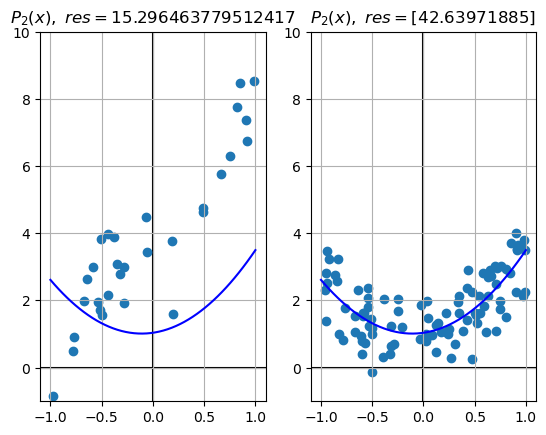

In [61]:
pom=np.polyval(p2[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_{2}(x),\ res=$"+str(res2))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_{2}(x),\ res=$"+str(p2[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [62]:
p3valid=np.polyval(p3[0],valid_x)
res3=np.linalg.norm(p3valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p3[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res3/k)

srednjekvadratna greska model na trening podacima= [0.64976752]
srednjekvadratna greska model na validacionim podacima= 2.8233595417951665


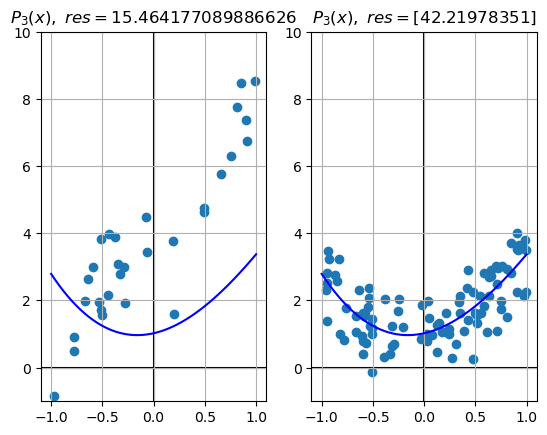

In [63]:
pom=np.polyval(p3[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_{3}(x),\ res=$"+str(res3))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_{3}(x),\ res=$"+str(p3[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

In [64]:
p20valid=np.polyval(p20[0],valid_x)
res20=np.linalg.norm(p20valid-valid_y)
print("srednjekvadratna greska model na trening podacima=",np.sqrt(p20[1]/m))
print("srednjekvadratna greska model na validacionim podacima=",res20/k)

srednjekvadratna greska model na trening podacima= [0.59292516]
srednjekvadratna greska model na validacionim podacima= 2.9149179971508685


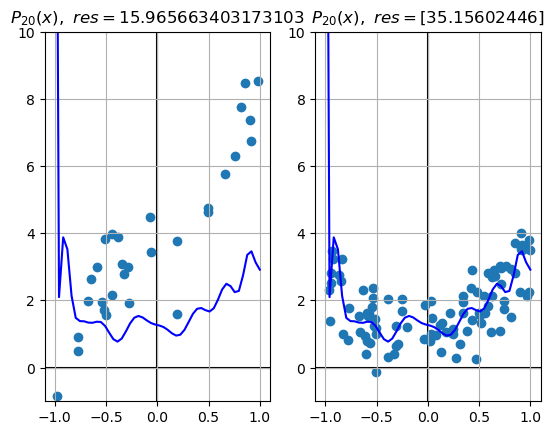

In [65]:
pom=np.polyval(p20[0],t)
plt.subplot(1, 2, 1)
plt.title(r"$P_{20}(x),\ res=$"+str(res20))
plt.plot(t,pom,'-b')
plt.scatter(valid_x,valid_y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$P_{20}(x),\ res=$"+str(p20[1]))
plt.plot(t,pom,'-b')
plt.scatter(x,y)
plt.ylim([-1, 10])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

***